# Gerardo de Miguel González

## Práctica 4 de Estadística para Data Science

### Problema 0

*Generacion de numeros aleatorios siguiendo una distribucion dada (Recordatorio de teoría)*

**::GMG::** Apuntes de referencia (numeros_aleatorios_2.R, 5.8. Generación de numeros aleatorios uniformes en pdf pp. 35-36)

#### Metodo de la funcion de distribucion inversa 

 $X = F_X^{-1} (U)$ sigue distribución $F_X(x)$ siendo `U ~ Unif (0,1)`

**::GMG::** Referencias

- Quantitations [Blog Sampling from an Arbitrary Density Math, CS, Data](http://blog.quantitations.com/tutorial/2012/11/20/sampling-from-an-arbitrary-density). Published 20 November 2012
- StackExchange Cross-Validated [How does the inverse transform method work?](https://stats.stackexchange.com/questions/184325/how-does-the-inverse-transform-method-work)


**Ejemplo 1**: Generar numeros distribuidos con (pdf) 

$f(x) = sin(x),  0\leq x\leq \pi/2$

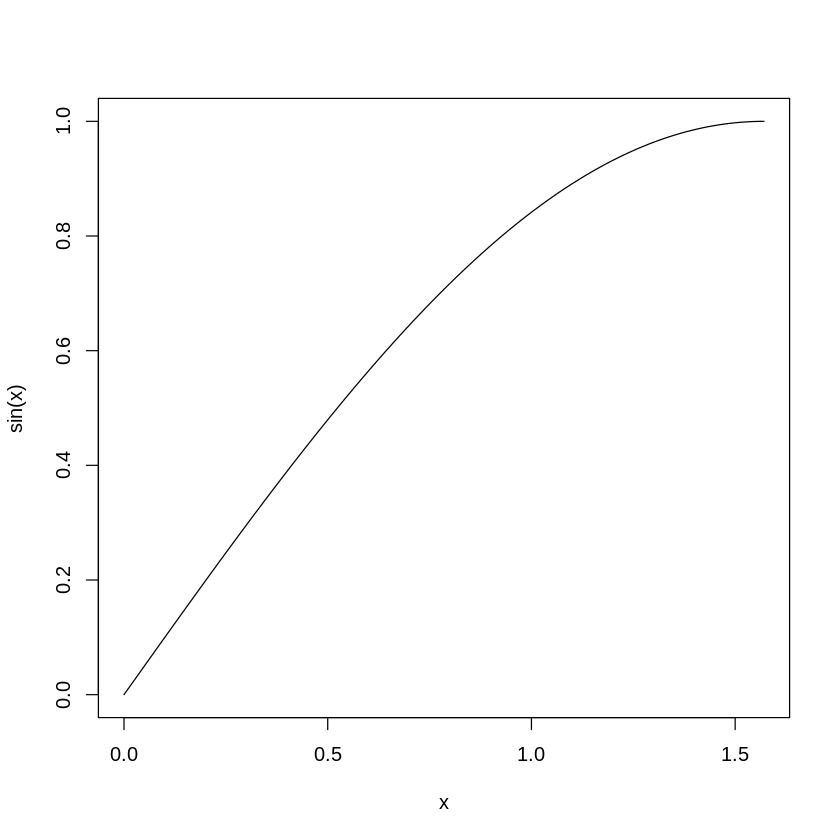

In [1]:
#Dibujamos pdf f(x):
curve(sin(x),0,pi/2)

Calculamos CDF: 

$F(x)=  \begin{cases} 
      0 & x \lt 0 \\
      1-cos(x) & 0\leq x\leq \pi/2 \\
      1 & x\gt \pi/2 
   \end{cases}$

Calculamos la inversa de CDF:

$F^{-1}(u)= acos(1-u)$


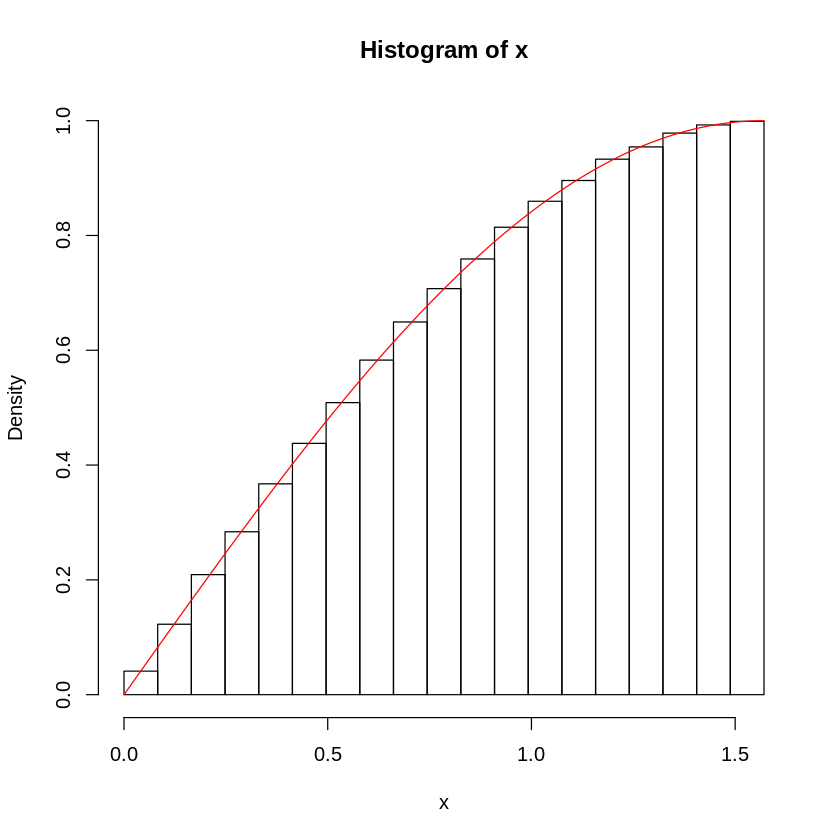

In [3]:
# Simulamos:
x <- acos(1-runif(1000000)) 

#Dibujamos histograma y funcion densidad:
hist(x,breaks=seq(0,pi/2,length=20),freq=F)
curve(sin(x),0,pi/2,add=T,col=2)

#### Metodo del rechazo

Generamos M números uniformes $(x_i,y_i)$ i=1,2,...,M  en un recinto que contenga a f(x). Aceptamos si $y_i < f(x_i)$ 

Las $x_i$ de los N números aceptados se distribuyen con función densidad f(x).

**Ejemplo 2**: Generar numeros distribuidos con pdf

$f(x)=1-|1-x|$ con $0 \leq x \leq 2$

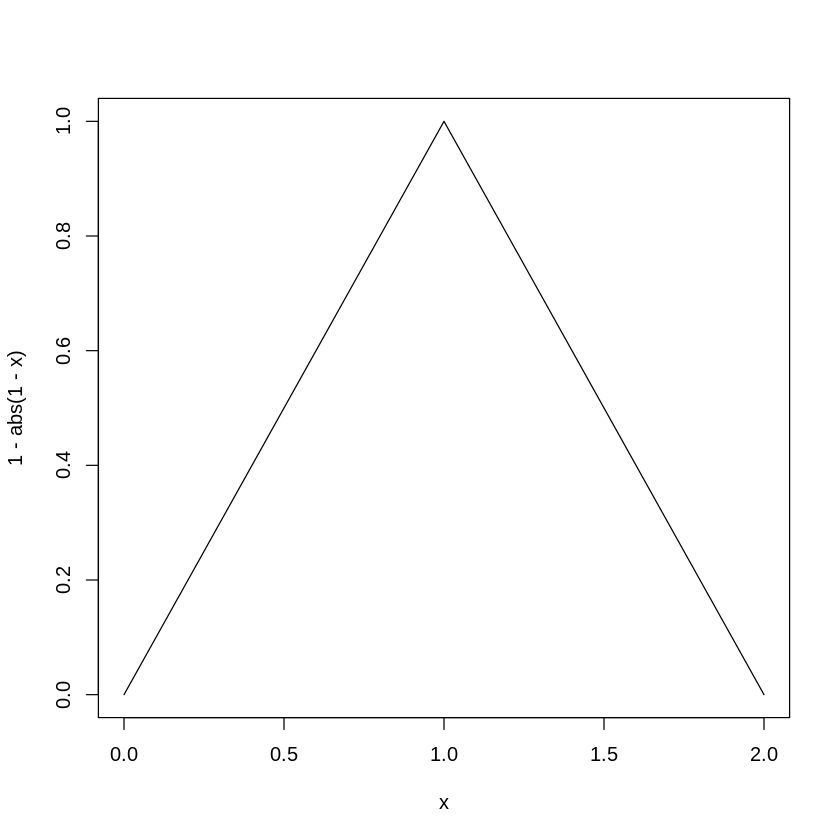

In [5]:
#Dibujamos f(x):
curve(1-abs(1-x),0,2)

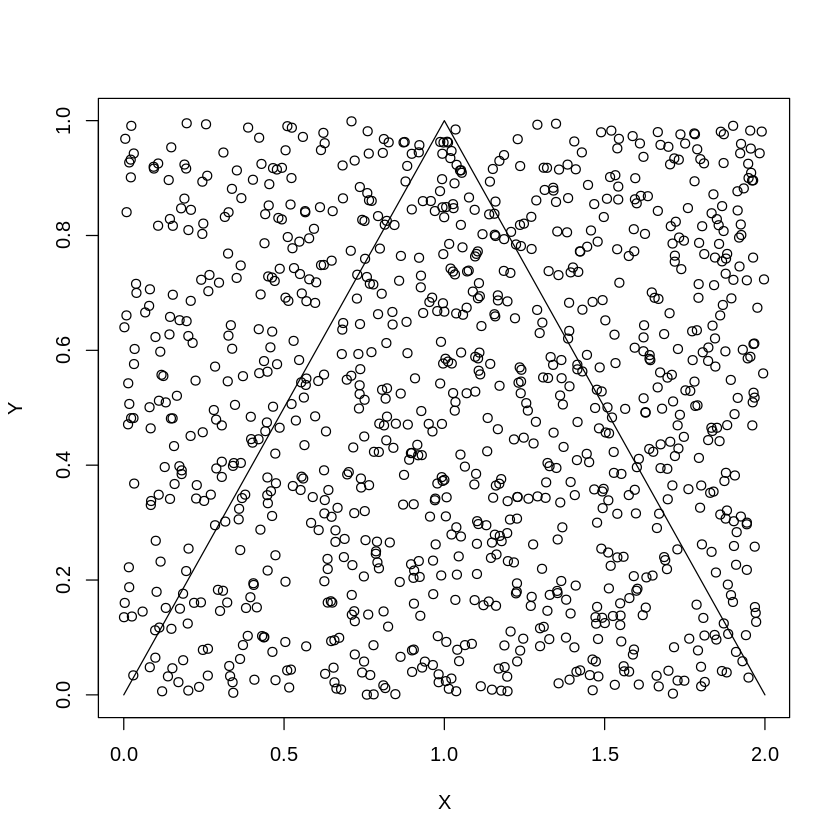

In [6]:
#Simulamos en el recinto 0<= x <= 2, 0 <= y <=1
M<-1000

X <- runif(M, 0, 2)
Y <- runif(M)

#Dibujamos los puntos simulados (Usar pocos puntos sino ignorar)
plot(X,Y) 
#Superponemos f(x)
curve(1-abs(1-x),0,2, add=T)

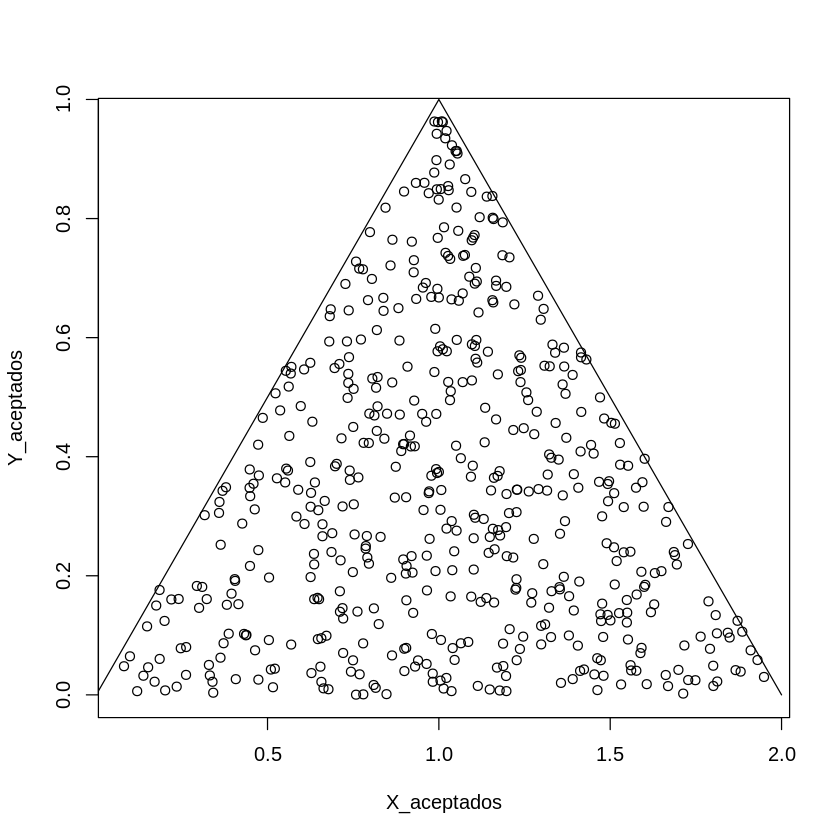

In [7]:
#Aceptamos si y_i < f(x_i):
X_aceptados <- X[which(Y < (1 - abs(1 - X)))]
Y_aceptados <- Y[which(Y < (1 - abs(1 - X)))]

#Dibujamos los puntos aceptados (Usar pocos puntos sino ignorar)
plot(X_aceptados,Y_aceptados)
#Superponemos f(x)
curve(1-abs(1-x),0,2, add=T)

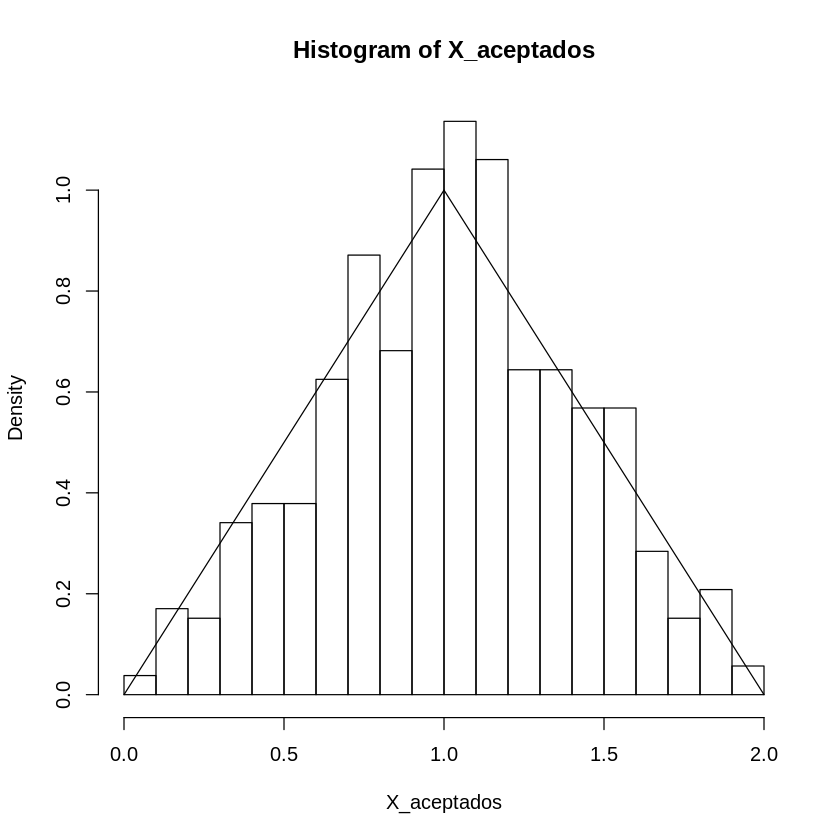

In [8]:
#Dibujamos histograma y funcion densidad:
hist(X_aceptados,20,freq=F)
curve(1-abs(1-x),0,2, add=T)

#### Generacion de numeros aleatorios normales: Método Box-Müller

**::GMG::** Referencias

- Wikipedia [Box-Muller Transform](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)
- R Bloggers [Generation of a normal distribution from "scratch" – The box-muller method](https://www.r-bloggers.com/generation-of-a-normal-distribution-from-scratch-the-box-muller-method/). November 3, 2012 By Edwin Grappin

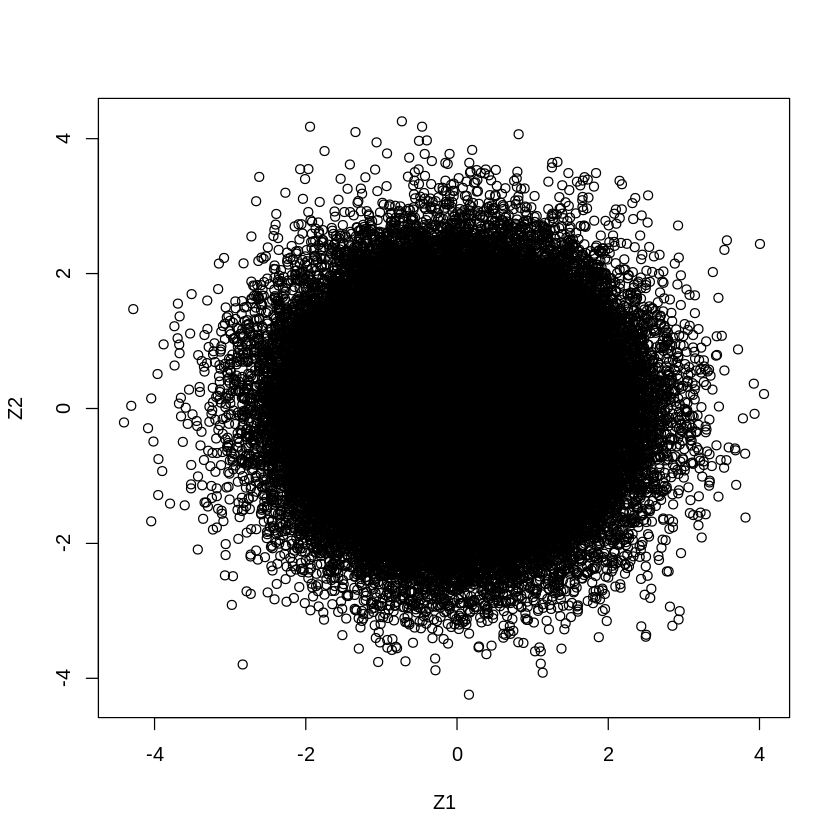

In [9]:
#Si generamos dos números normales  Z1, Z2:
Z1<-rnorm(100000)
Z2<-rnorm(100000)

plot(Z1,Z2) #Usar pocos puntos sino ignorar

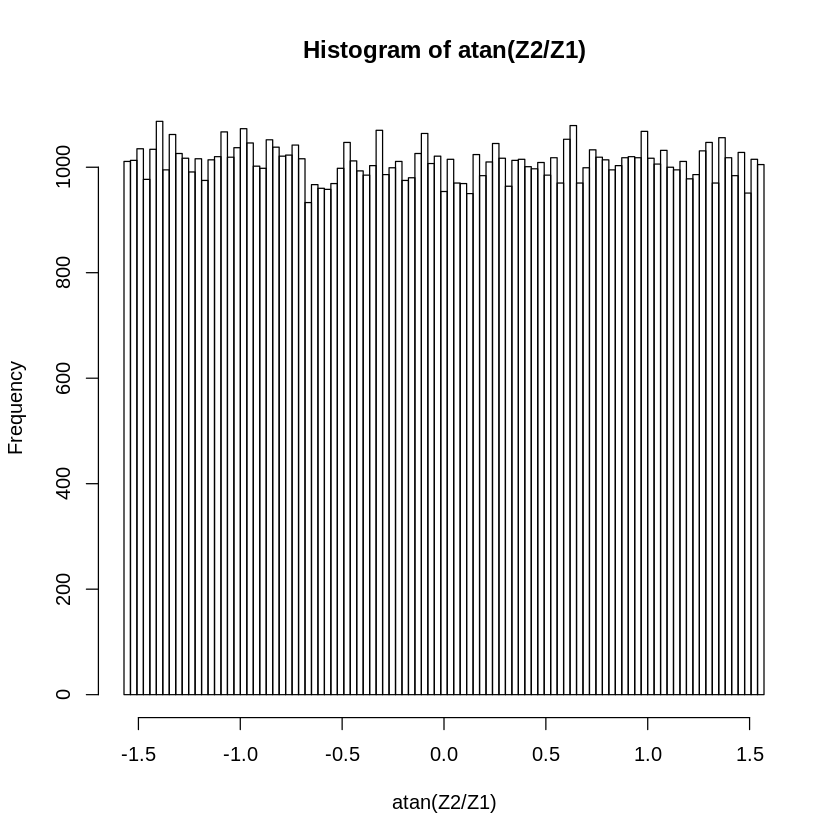

In [10]:
#Veamos la distribucion del angulo del vector que une con el origen:
bines<-seq(-pi/2,pi/2,length=100)
hist(atan(Z2/Z1),bines)

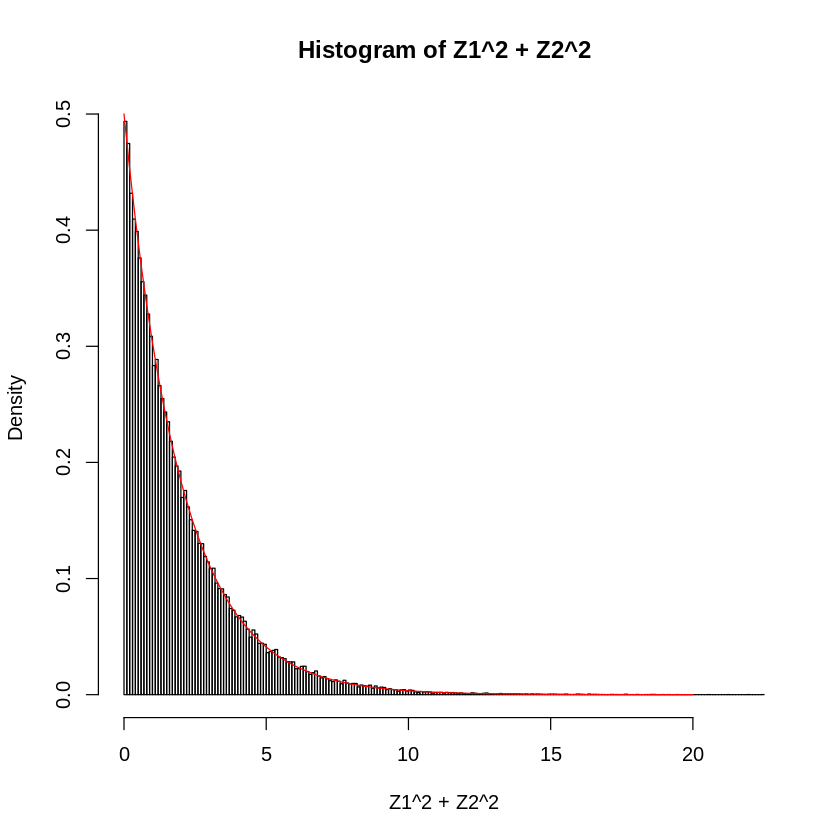

In [11]:
#Veamos la distribucion del modulo del vector:
hist(Z1^2+Z2^2,200,freq=F)
curve(dexp(x,1/2),0,20,add=T,col=2)

In [12]:
#Utilizando estas propiedades podemos recorrer el camino inverso:
#Generamos un número uniforme y otro exponencial y los combinamos para obtener dos números normales:

U1<-runif(100000)
U2<-runif(100000)

Z1 <- sqrt(-2*log(U1)) * cos(2*pi*U2) 
Z2 <- sqrt(-2*log(U1)) * sin(2*pi*U2) 

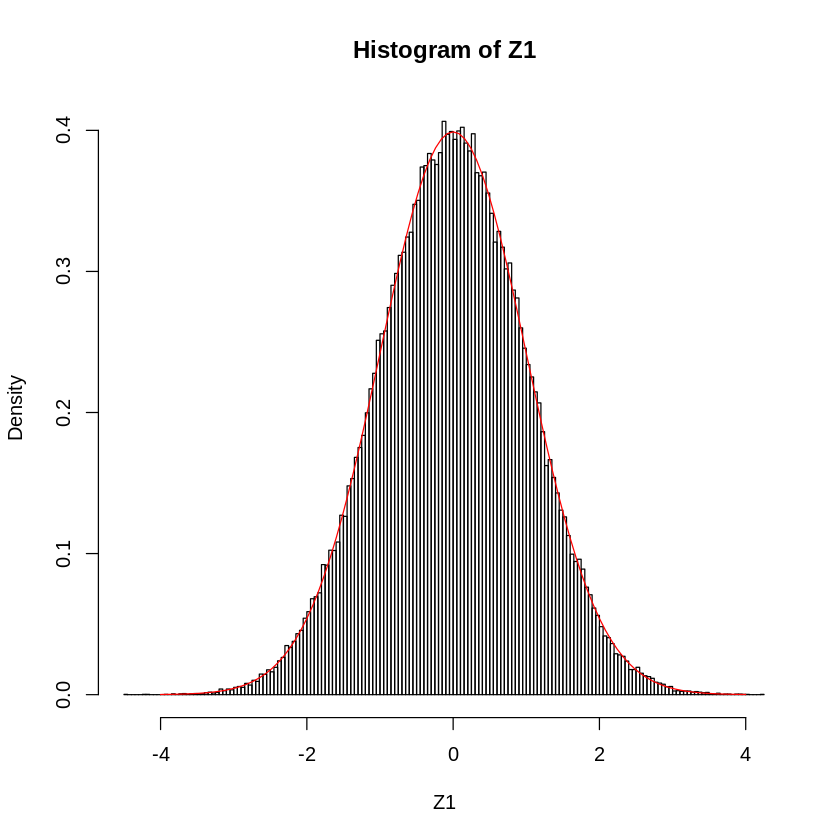

In [13]:
hist(Z1,200,freq=F)
curve(dnorm(x),-4,4,add=T,col=2)

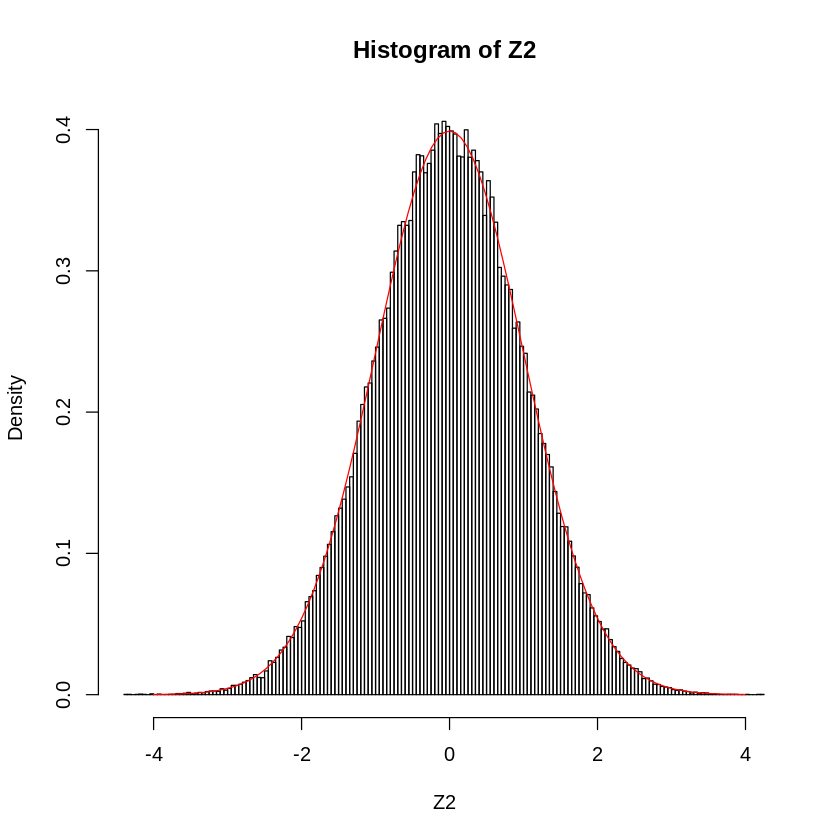

In [14]:
hist(Z2,200,freq=F)
curve(dnorm(x),-4,4,add=T,col=2) 

### Problema 1 

*Simula los siguientes experimentos aleatorios usando la función runif*

i) Extraemos una carta al azar de una baraja española y vemos si es un basto o no.

::GMG::Referencias

- Wikipedia [Spanish Playing Cards](https://en.wikipedia.org/wiki/Spanish_playing_cards)

> They have four suits and a deck is usually made up of 40 or 48 cards.

Supongo que tengo 40 cartas, distribuidas en 4 palos {oros, copas, bastos, espadas} con 10 cartas cada uno {1,2,3,4,5,6,7,10,11,12}.

El experimento "extraemos al azar una carta de una baraja española" se puede definir

ii) Repetimos n veces el experimento del apartado anterior y anotamos el número de bastos.

### Problema 2 

*El número de kilómetros recorridos, X, hasta que se produce una caída en una determinada carrera ciclista se puede modelizar con una distribución exponencial con función densidad:*

$f(x) = λe^{−λx}$ 

*Siendo λ = 0.01 el número medio de caídas por kilómetro.*

**::GMG::** Hay que hacer notar que para que f(x) cumpla que:

$$\int_{-\infty}^{\infty} f(x) dx = 1$$

se debe cumplir que $x \geq 0$ ya que

$$\int_{0}^{\infty} \lambda e^{-\lambda x} dx = -e^{-\lambda x}|_{0}^{\infty} = 0 - ( -1) = 1$$

así que

$$ f(x; \lambda) = \begin{cases} 
      \lambda e^{-\lambda x} & x\geq 0 \\
      0 & x < 0 
   \end{cases}
$$

i) Simula 1000 distancias entre caídas.

**::GMG::** La CDF es [Wikipedia](https://en.wikipedia.org/wiki/Exponential_distribution#Cumulative_distribution_function)

$$ F(x; \lambda) = \begin{cases} 
      1 - e^{-\lambda x} & x\geq 0 \\
      0 & x < 0 
   \end{cases}
$$

y la inversa (*inverse cumulative distribution function*) es la función `quantile` [Wikipedia](https://en.wikipedia.org/wiki/Exponential_distribution#Quantiles):

$$ F^{-1}(u; \lambda) = \frac {-ln \left(1-u\right)}{\lambda} \; \; {0 \leq u < 1} $$


In [44]:
pdf.exp <- function (x,lambda = 0.01) {
    ifelse(x>=0,lambda*exp(-lambda*x),0)
}

In [45]:
#::GMG::Simulo
set.seed(1)
lambda <- 0.01
U <- runif(n = 1000)
X <- -log(1-U)/lambda

ii) Compara gráficamente los números aleatorios con la distribución teórica.

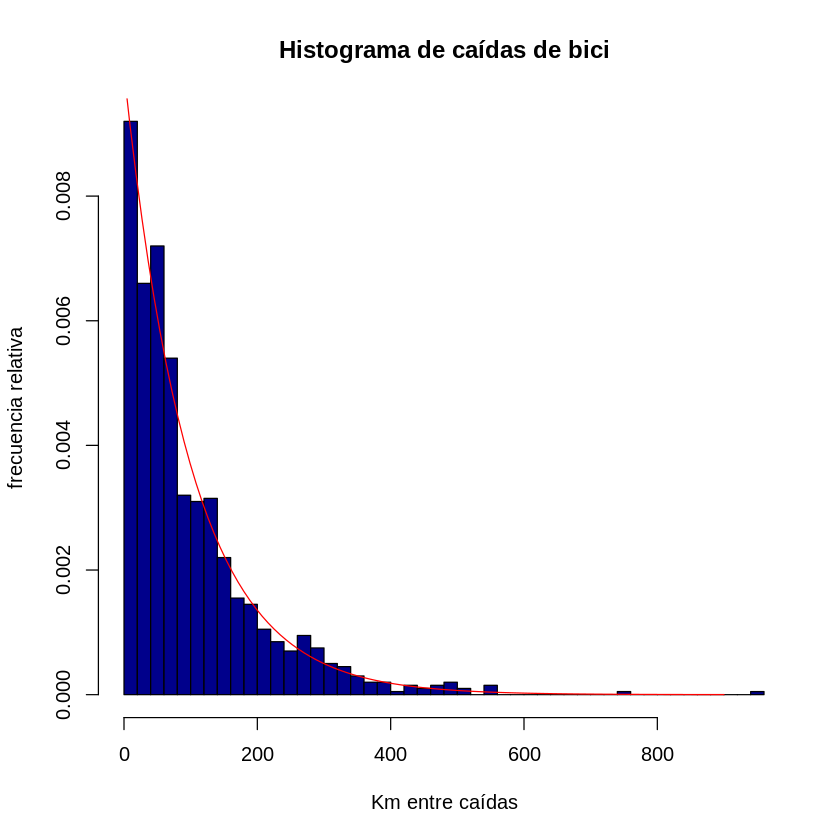

In [50]:
hist(X, freq=FALSE,
     xlab='Km entre caídas', ylab = 'frecuencia relativa',
     #xlim = c(min(X),max(X)),
     col = 'darkblue', breaks='FD',
     main = 'Histograma de caídas de bici')
curve(pdf.exp,0,900,add=TRUE,col='red')

### Problema 3 

*El tamaño angular en grados, X, de unos determinados objetos en el cielo es una variable aleatoria X con función densidad* 

$f(x) = Kx^{−3}$

*siendo x > 1 por razones físicas.*

i) Halla el valor de la constante K > 0.

$\int_{-\infty}^{\infty} f(x) dx = K \int_{1}^{360} x^{-3} dx = 1$

In [38]:
#::GMG::Para calcular K aprovechamos la propiedad de la integral de la pdf f(x) sobre
#       el dominio (1,360) que debe ser 1
K <- 1/integrate(f = function(x) {x**-3},lower = 1,upper = 360)$value
paste('Valor de K:',round(K,5))

[1] "Valor de K: 2.00002"

In [39]:
#::GMG::Luego tengo pdf f(x) para 1 <= x <= 360, 0 en otro caso
# https://nicercode.github.io/guides/functions/
# https://www.statmethods.net/management/userfunctions.html
# https://stackoverflow.com/questions/11965515/how-to-define-a-vectorized-function-in-r
# https://stackoverflow.com/questions/4042413/vectorized-if-statement-in-r
pdf.x <- function (x) {
    ifelse (x >=1 & x<=360,K*x^-3,0)
}

ii) Genera 1000 números aleatorios siguiendo la distribución de X.

**::GMG::** Uso el método de la CDF inversa; primero necesito calcular la CDF

https://www.wolframalpha.com/input/?i=integrate+2.00001543216042*t%5E-3+from+1+to+x

$F_X(x) = \int_{1}^{x} 2.00001543216042 t^{-3} dt \approx 1 - \frac{1}{x^2}$ con $1 \leq x \leq 360$

Luego hayo la inversa $F_X^{-1}(U)$:

$u = 1 - \frac{1}{x^2}$

$1 - u = \frac{1}{x^2}$

$\frac{1}{1-u} = {x^2}$

$\sqrt{\frac{1}{1-u}} = x$

Luego:

U ~ Unif(0,1), $F_X^{-1}(U) = \sqrt{\frac{1}{1-u}}$

In [33]:
CDF.x <- function(x) {
    ifelse (x >=1 & x<=360, 1 - 1/x^2,0)
}

In [41]:
#::GMG::Simulo
set.seed(1)
U <- runif(n = 1000)
X <- sqrt(1/(1-U))

iii) Compara gráficamente los números aleatorios con la distribución teórica.

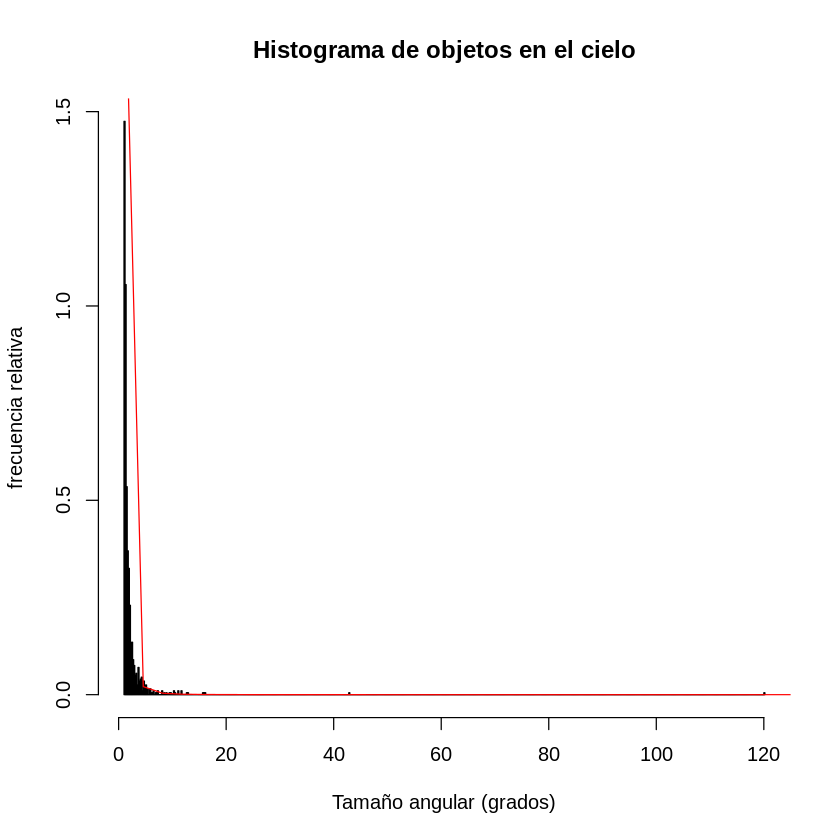

In [42]:
#::GMG::Dibujamos el histograma de la simulación y la curva de la pdf teórica
hist(X, freq=FALSE,
     xlab='Tamaño angular (grados)', ylab = 'frecuencia relativa',
     xlim = c(min(X),max(X)),
     col = 'darkblue', breaks='FD',
     main = 'Histograma de objetos en el cielo')
curve(pdf.x,1,360,add=TRUE,col='red')

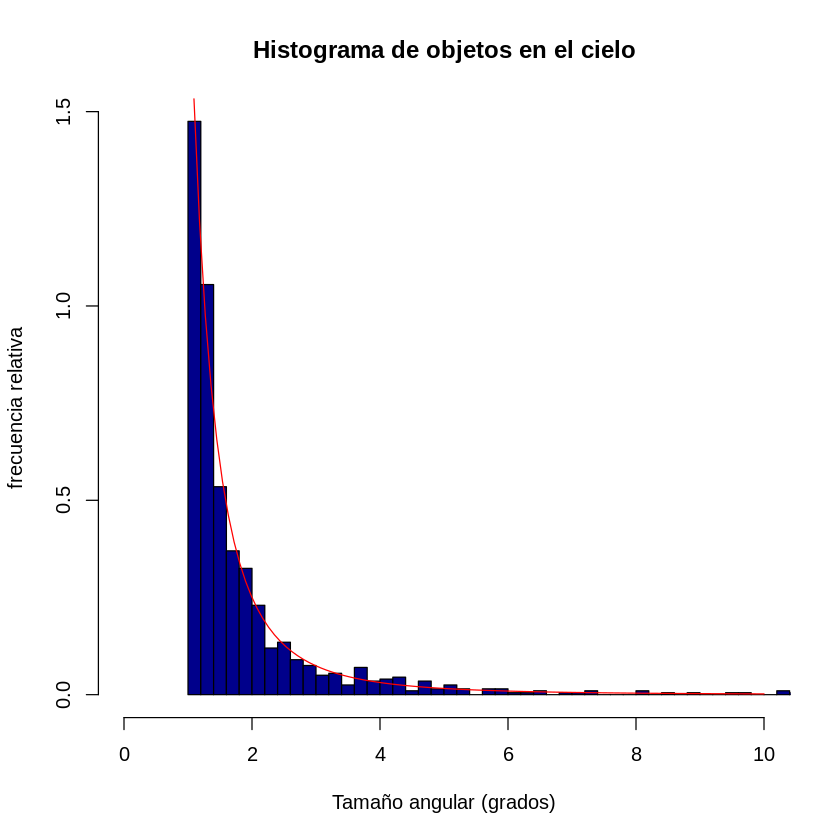

In [43]:
#::GMG::Detalle de la parte más significativa
hist(X, freq=FALSE,
     xlab='Tamaño angular (grados)', ylab = 'frecuencia relativa',
     xlim = c(0,10),
     col = 'darkblue', breaks='FD',
     main = 'Histograma de objetos en el cielo')
curve(pdf.x,1,10,add=TRUE,col='red')